<a href="https://colab.research.google.com/github/annisaaseptianthy/AI_ML_prediction/blob/main/studentscores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# @title Import Data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# import all the libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/Copy of student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
# @title Exploratory Data Analysis
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Actual Data Count: 25
data count after duplicates deleted: 25
Missing values:
 Hours     0
Scores    0
dtype: int64
Missing values after deleted:
 Hours     0
Scores    0
dtype: int64


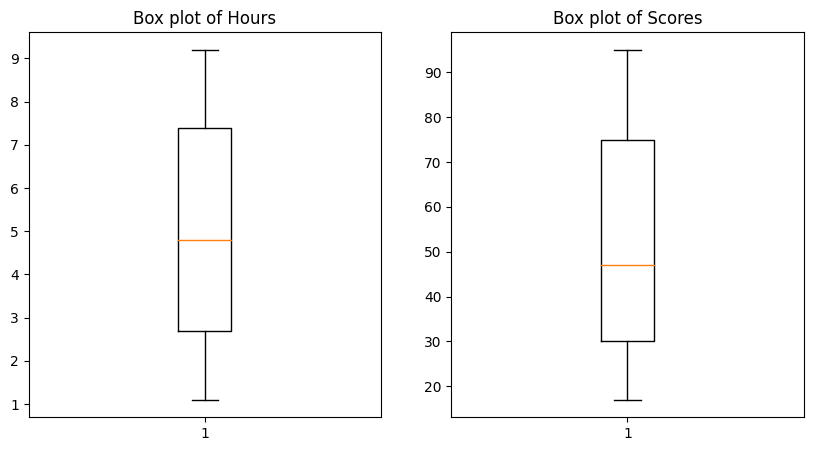

data count after delete outlier data: 25


In [6]:
# @title Ensure Data Quality: Eliminate Duplicates, Address Missing Values, and Identify Outliers
print("Actual Data Count:", len(data))

# drop_duplicates
data = data.drop_duplicates()

# check data count after drop_duplicates
print("data count after duplicates deleted:", len(data))

# check missing values
print("Missing values:\n", data.isnull().sum())

# drop missing values row
data = data.dropna()

# recheck missing values
print("Missing values after deleted:\n", data.isnull().sum())

#check outlier
from scipy import stats

# data visualization with box plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['Hours'])
plt.title('Box plot of Hours')

plt.subplot(1, 2, 2)
plt.boxplot(data['Scores'])
plt.title('Box plot of Scores')
plt.show()

# calculate z-score for each column
z_scores = np.abs(stats.zscore(data[['Hours', 'Scores']]))

# find threshold for z-score (3)
threshold = 3

# find not outlier data
data = data[(z_scores < threshold).all(axis=1)]

# check data count after delete outlier
print("data count after delete outlier data:", len(data))

Dari Featuring Engineering diatas, didapatkan bahwa data tidak memiliki nilai duplikasi, outlier, atau nilai yang hilang sehingga bisa langsung melatih model pada seluruh dataset. Namun, tidak disarankan untuk melewati uji set karena alasan :
1.   Evaluasi Model: Membagi data memungkinkan Anda untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, memberikan gambaran yang lebih akurat tentang bagaimana model akan bekerja pada data baru.
2.   Overfitting : Melatih model pada seluruh dataset tanpa pengujian dapat menyebabkan overfitting, di mana model terlalu baik dalam menghafal data pelatihan tetapi tidak bekerja dengan baik pada data baru.

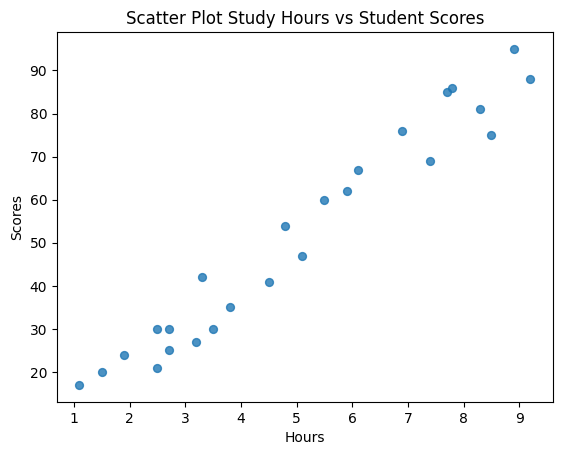

In [20]:
# @title Scatter Plot (Hours vs Scores)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.title('Scatter Plot Study Hours vs Student Scores')
plt.gca().spines[['top', 'right',]].set_visible(True)


In [21]:
from sklearn.linear_model import LinearRegression

# @title Linear Regression
# split feature (X) and target (y)
X = data['Hours'].values.reshape(-1, 1)  # convert data to 2D array
y = data['Scores'].values  # Target kept 1D array

# regresi linear model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

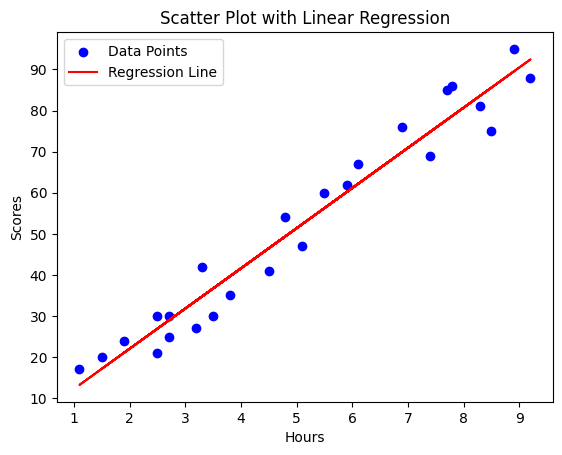

In [24]:
# prediction y using linear regression model
y_pred = model.predict(X)

# Membuat scatter plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [26]:
# calculate coef dan intercept
coef = model.coef_[0]
intercept = model.intercept_

print(f'Koefisien (slope): {coef}')
print(f'Intersep (y-intercept): {intercept}')

# calculate R-squared
r_squared = model.score(X, y)

print(f'R-squared: {r_squared}')

Koefisien (slope): 9.775803390787468
Intersep (y-intercept): 2.48367340537321
R-squared: 0.9529481969048356


X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5,)
R-squared (train-test split): 0.9678055545167994


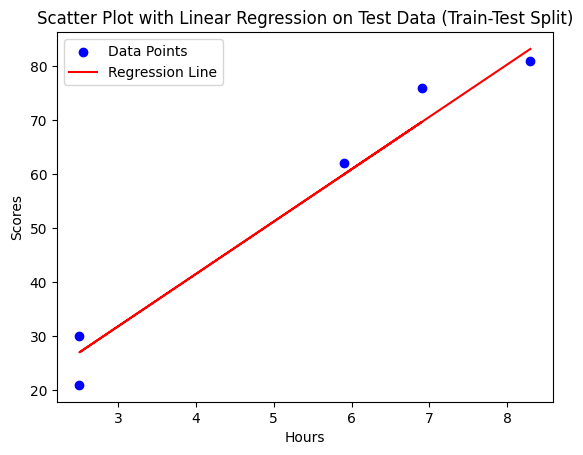

In [27]:
# @title Linear Regression with train-test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# data split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# plot linear regression model
model_train_test = LinearRegression()
model_train_test.fit(X_train, y_train)

# test set prediction y
y_test_pred = model_train_test.predict(X_test)

# calculate R-squared test set
r2_test = r2_score(y_test, y_test_pred)

print(f'R-squared (train-test split): {r2_test}')

# scatter plot with regression linear train-set split
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_test_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Linear Regression on Test Data (Train-Test Split)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

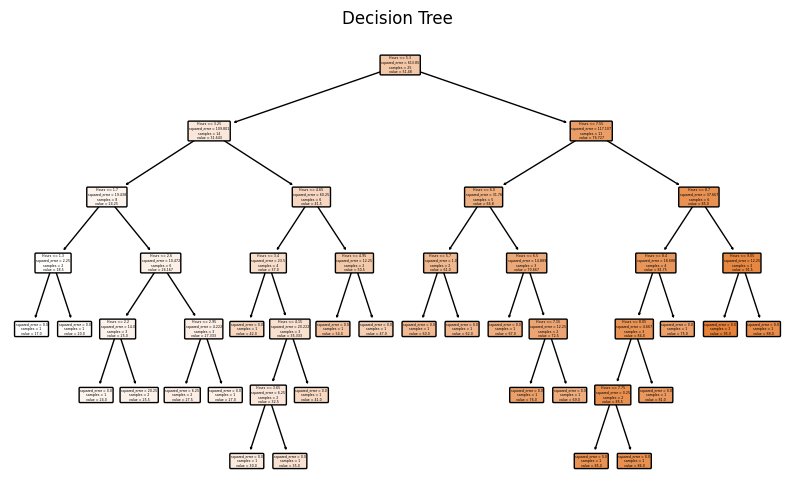

In [30]:
# @title Decision Tree

from sklearn.tree import DecisionTreeRegressor, plot_tree

# split feature and target
X = data['Hours'].values.reshape(-1, 1)  # convert data into 2D array
y = data['Scores'].values  # Target 1D array

# model decision tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

# Plot decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=['Hours'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

In [31]:
# calculate R-squared value of decision tree
r_squared_tree = tree_model.score(X, y)

print(f'R-squared (Decision Tree): {r_squared_tree}')

R-squared (Decision Tree): 0.996546385303501


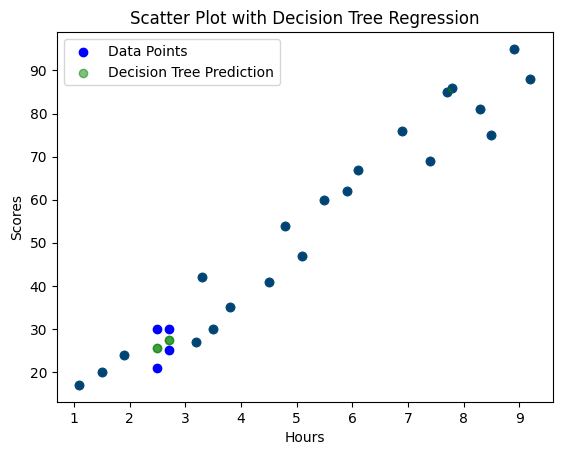

In [32]:
# Predict y value with decision tree model
y_tree_pred = tree_model.predict(X)

# scatter plot with decision tree prediction
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X, y_tree_pred, color='green', label='Decision Tree Prediction', alpha=0.5)
plt.title('Scatter Plot with Decision Tree Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# R-score Comparation 2 Models

In [33]:
print(f'R-score (Linear Regression): {r_squared}')
print(f'R-score (Linear Regression train-test split): {r2_test}')
print(f'R-score (Decision Tree): {r_squared_tree}')

R-score (Linear Regression): 0.9529481969048356
R-score (Linear Regression train-test split): 0.9678055545167994
R-score (Decision Tree): 0.996546385303501
